# Face Verification

#### General Steps to Follow

1. Problem Statement
2. Importing Packages
3. Data Collection
4. Checking the Data

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 1) Problem statement
- This is a face verification model of me, Amro Meshref. The goal is to find out if the input image is me or not me

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Importing Packages


In [33]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import uuid

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Data Collection

Dataset Sources:
- Negative Examples: http://vis-www.cs.umass.edu/lfw/
- Anchor and Positive Examples: Images from a webcam

#### Setup paths

In [ ]:
lfw_path = "../data/lfw"
pos_path = "../my data/positive"
neg_path = "../my data/negative"
anc_path = "../my data/anchor"

### 3.1 Move lfw images to the "my data" folder

In [11]:
for directory in os.listdir(lfw_path):
    for file in os.listdir(os.path.join(lfw_path, directory)):
        EX_PATH = os.path.join(lfw_path, directory, file)
        NEW_PATH = os.path.join(neg_path, file)
        os.replace(EX_PATH, NEW_PATH)

### --------------------------------------------------------------------------------

### 3.2 Checking the shape of negative images

In [99]:
negative_check = []
cnt = 1
for img_name in os.listdir(neg_path):
    if cnt > 200:
        break
    cnt += 1
    path = neg_path + "/" + img_name
    image = plt.imread(path)
    negative_check.append(image)
negative_check = np.array(negative_check)

In [100]:
print("Negative examples array shape :", negative_check.shape)

Negative examples array shape : (200, 250, 250, 3)


#### Some Comments
* The shape of a negative image is (250, 250, 3)
* Make sure that positive and anchor images are of the same shape as negative images

### --------------------------------------------------------------------------------

### 3.3) Collecting anchor and postitive examples from a webcam

* The collected images of anchor and positive will have the same shape like the negative images: (250, 250, 3)
* When you press 'a' on the keyboard after running the code below, it will collect anchor images and saves them into "my data/anchor".
* When you press 'p' on the keyboard after running the code below, it will collect positive images and saves them into "my data/positive".
* When you press 'q' on the keyboard, it will quit.

#### This code collected anchor and positive images from the webcam and saved them into "my data" folder

In [56]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(anc_path, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(pos_path, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()    

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Checking the Data

### 4.3 Loading anchor, positive, and negative arrays from "my data" folder

#### Each of anchor, positive, and negative images will contain 500 images of shape (250, 250, 3) 
#### These arrays were defined in the "data_transformation" file in the "notebook" folder and then were saved into "my data" folder

In [86]:
anchor = np.load("../my data/anchor_array.npy")
positive = np.load("../my data/positive_array.npy")
negative = np.load("../my data/negative_array.npy")

In [87]:
print("Anchor examples array shape   :", anchor.shape)
print("Poitive examples array shape  :", positive.shape)
print("Negative examples array shape :", negative.shape)

Anchor examples array shape   : (500, 250, 250, 3)
Poitive examples array shape  : (500, 250, 250, 3)
Negative examples array shape : (500, 250, 250, 3)


#### Visualizing positive, anchor and negative images

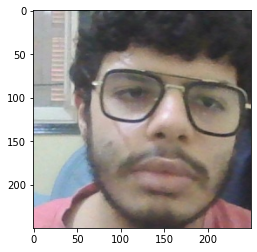

In [88]:
plt.imshow(anchor[100])

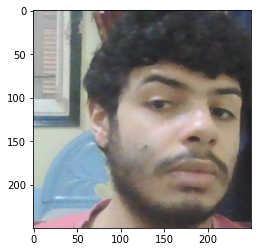

In [89]:
plt.imshow(positive[100])

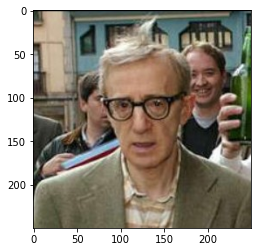

In [90]:
plt.imshow(negative[100])

#### Some Comments
* The shapes of anchor, positive, and negative images matche and it is (250, 250, 3)

### --------------------------------------------------------------------------------